# Аналитика в авиакомпании

Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят фестивали. Результаты данного анализа помогут авиакомпании лучше понять предпочтения клиентов.

### Описание данных

query_1.csv:
- model — модель самолета;
- flights_amount — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

query_3.csv:
- city — город;
- average_flights — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

query_last.csv:
- week_number — номер недели;
- ticket_amount — количество проданных билетов за неделю;
- festival_week — есть ли на этой неделе фестиваль;
- festival_name — название фестиваля.

### Библиотеки и модули

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import stats as st

### Содержание

1. Аналитика
    - Изучение общей информации о данных
    - Проверка корректности типов данных
    - Топ-10 городов по количеству рейсов
    - Графики
2. Проверка гипотезы

## Аналитика

### Изучение общей информации о данных

In [2]:
path_1 = '/datasets/query_1.csv'
path_3 = '/datasets/query_3.csv'
path_last = '/datasets/query_last.csv'

In [3]:
query_1 = pd.read_csv(path_1)
query_3 = pd.read_csv(path_3)
query_last = pd.read_csv(path_last)

In [4]:
query_1.head(5)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [5]:
query_3.head(5)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
query_last.head(5)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN


In [7]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [8]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [9]:
query_last.describe()

,week_number,ticket_amount,festival_week
count,10.00000,10.000000,3.000000
mean,34.50000,50670.400000,32.333333
std,3.02765,2502.752716,3.214550
min,30.00000,43568.000000,30.000000
25%,32.25000,51364.500000,30.500000
50%,34.50000,51439.000000,31.000000
75%,36.75000,51596.750000,33.500000
max,39.00000,51675.000000,36.000000


### Проверка корректности типов данных

In [10]:
print(query_1.info())
print()
print(query_3.info())
print()
print(query_last.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes
None


Типы данных корректны.

### Топ-10 городов по количеству рейсов

In [11]:
top_10 = query_3.sort_values('average_flights', ascending=False).head(10)
top_10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


### Графики

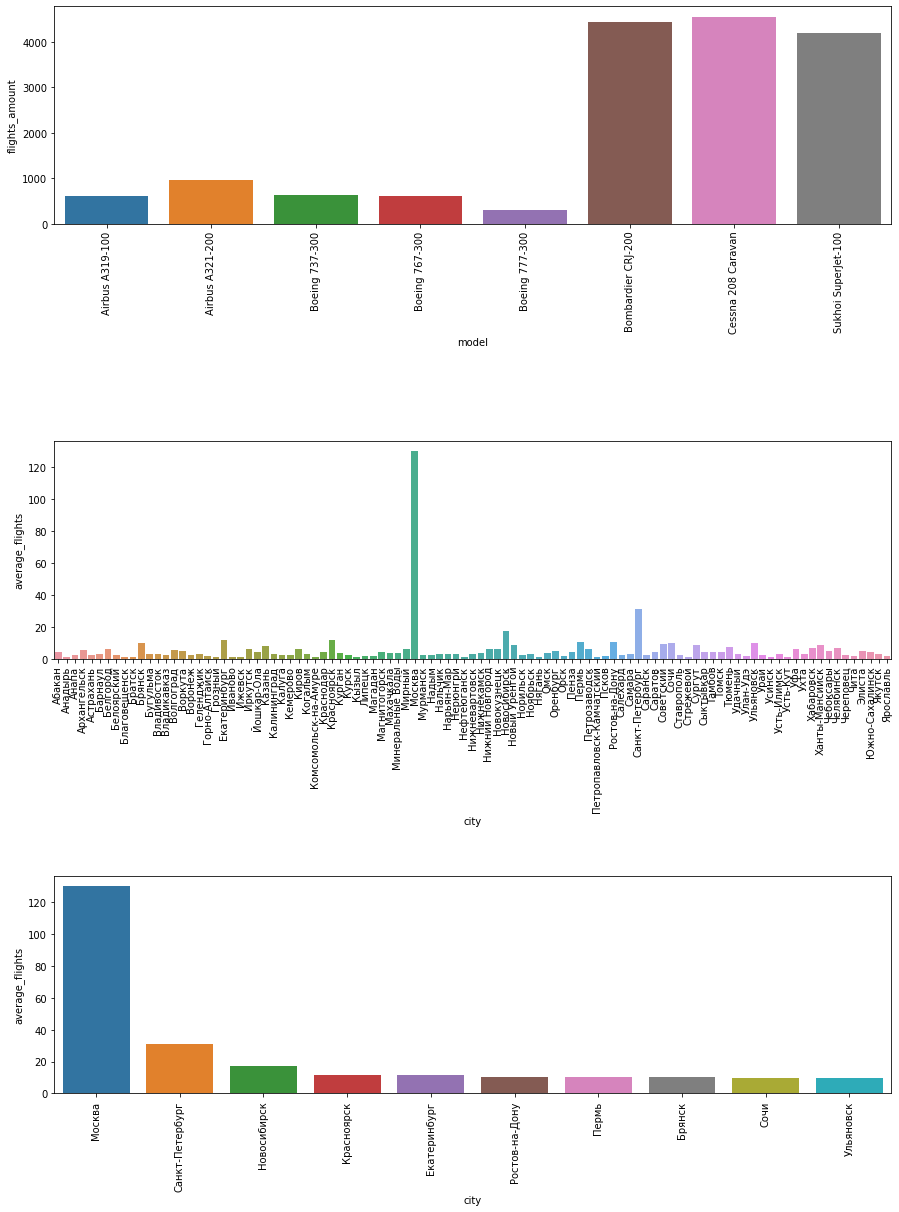

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))
sns.barplot(data=query_1, x='model', y='flights_amount', ax=ax[0])
sns.barplot(data=query_3, x='city', y='average_flights', ax=ax[1])
sns.barplot(data=top_10, x='city', y='average_flights', ax=ax[2])

ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)

plt.subplots_adjust(wspace=0, hspace=1)
plt.show()

#### Вывод

В среднем большего всего рейсов совершают самолеты следующих моделей: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi Superjet-100. А больше всего рейсов в России совершаются в такие города как Москва, Санкт-Петербург, Новосибирск, Красноярск и др.

## Проверка гипотезы

In [13]:
query_last.head(3)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN


Гипотеза: средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.

Данная гипотеза относится к гипотезе о равенстве средних двух генеральных совокупностей.

Гипотеза H0: средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время.  
Альтернативная гипотеза H1: -//- не равны.

Выдели отдельно две выборки, где в одной хранится информация о количестве купленных билетах во время фестивалей, в другой - количество купленных билетов не во время фестивалей.

In [14]:
fest = query_last.query("festival_week.isnull() == False and festival_name.isnull() == False")['ticket_amount']
no_fest = query_last.query("festival_week.isnull() == True and festival_name.isnull() == True")['ticket_amount']

In [15]:
alpha = .05

In [17]:
print('Дисперсии выборок:', np.var(fest), '/////', np.var(no_fest))

result = st.ttest_ind(fest, no_fest, equal_var=False)
print(f'p-value: {result.pvalue}')
if result.pvalue >= alpha:
    print('Не отвергаем гипотезу')
else:
    print('Отвергаем гипотезу')

Дисперсии выборок: 12998464.888888888 ///// 14694.408163265309
p-value: 0.377432493172683
Не отвергаем гипотезу


Получаем, что нулевая гипотеза верна, и количество билетов не отличается в дни фестивалей и в дни, когда их нет.